# Notebook KNN2: Kostenfunktion und Lernverfahren

In diesem Notebook wollen wir ein Modell für einen Datensatz von (x,y)-Punkten finden.
Zudem versuchen wir, ein neuronales Netz die Exponentialfunktion "lernen" zu lassen.

Aktivieren Sie zunächst folgende Zelle, um die nötigen Programmpakete zu laden. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
!pip install graphviz
!pip install tfgraphviz
import tfgraphviz as tfg
!git clone "https://github.com/Sammy-Jankins/KNN_Lernen.git" "KNN_Lernen" 2> /dev/null || (cd "/KNN_Lernen/" ; git pull)
import KNN_Lernen.KNN_Funktionen as knn

Populating the interactive namespace from numpy and matplotlib
/bin/bash: line 0: cd: /KNN_Lernen/: No such file or directory
fatal: not a git repository (or any of the parent directories): .git


# Datensatz 1: Ein lineares Modell
Der folgende Datensatz besteht aus 30 (x,y)-Paaren. Die x-Werte sind alle ganzen Zahlen von 0 bis 30, die 15 ausgenommen. 

**Unsere Aufgabe: Ein Modell für den Zusammenhang zwischen y und x finden und die y-Werte für x = 15 und x=40 schätzen/vorhersagen.**

Klicken Sie auf 'Play', um die Daten zu plotten. 


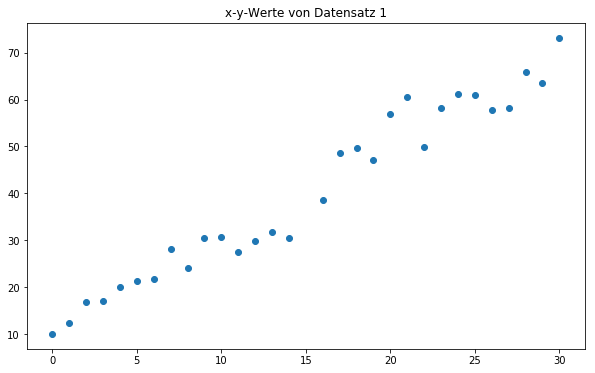

In [2]:
x_Werte = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.]
y_Werte = [10.01658801, 12.44031689, 16.74158448, 16.99873647, 19.9301948 ,
       21.3662462 , 21.81029917, 28.12350724, 23.99691104, 30.37132938,
       30.7411985 , 27.51173669, 29.86051921, 31.83605475, 30.53806554,
       38.67317334, 48.65172013, 49.65403085, 47.05943994,
       56.90034954, 60.5995608 , 49.83008854, 58.24880042, 61.19101233,
       61.06640885, 57.78297408, 58.12449899, 65.83760744, 63.55813398,
       73.22576714]
plt.title('x-y-Werte von Datensatz 1')
plt.scatter(x_Werte, y_Werte)
plt.show()

Ein Plot der Daten legt nahe, dass ein lineares Modell zugrunde liegt, d.h. y = ax + b. Bestimmen Sie die Werte a und b so, dass die rote Gerade möglichst gut passt. Unsere Vorhersage für x=15 bzw. 40 ist dann also a\*15 + b bzw. a\*40 + b. 

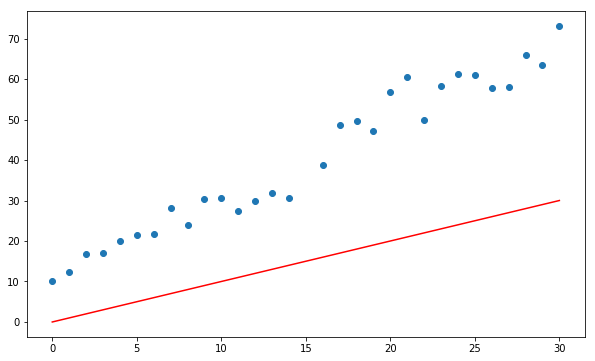

Vorhersage für x = 15: y = 15
Vorhersage für x = 40: y = 40


In [3]:
a = 1
b = 0

y_Gerade = np.multiply(x_Werte, a)
y_Gerade = np.add(y_Gerade, b)
plt.scatter(x_Werte, y_Werte)
plt.plot(x_Werte, y_Gerade, color='red')
plt.show()
print("Vorhersage für x = 15: y = " + str(15 * a + b))
print("Vorhersage für x = 40: y = " + str(40 * a + b))



---


Wenn ein neuronales Netz die Werte a und b automatisch finden soll, müssen wir eine zu minimierende Kostenfunktion für a und b angeben. Wir bestimmen den Fehler (die Kostenfunktion bzw. die Residuenquadratsumme) zwischen den gegebenen Daten und der Vorhersage des Modells, indem wir die Summe der Quadrate der Abstände bilden, d.h. Kosten(a,b) = (a x1 + b - y1)^2 + (a x2 + b - y2)^2 + ... + (a x30 + b - y30)^2.





In [4]:
Kosten = np.sum((y_Werte-y_Gerade)**2)
print("Der Fehler beträgt: " + str(Kosten))

Der Fehler beträgt: 21634.289439710687


Für welche Werte für a und b nimmt "Kosten(a,b)" den kleinsten Wert an? Das Modell für diese Werte heißt auch "Kleinste-Quadrate-Schätzung".

In [5]:
x_Mittel = np.mean(x_Werte)
y_Mittel = np.mean(y_Werte)
a_kqs = np.sum((x_Werte - x_Mittel)*(y_Werte-y_Mittel)) / np.sum((x_Werte - x_Mittel)**2)
b_kqs = y_Mittel - a_kqs * x_Mittel
print("Optimaler Wert für a: " + str(a_kqs) + " und für b: " + str(b_kqs))
y_Gerade_opt = np.multiply(x_Werte, a_kqs)
y_Gerade_opt = np.add(y_Gerade_opt, b_kqs)
print("Minimaler Kosten-Wert: " + str(np.sum((y_Werte-y_Gerade_opt)**2)))
print("Vorhersage für x=15: y = " + str(15 * a_kqs + b_kqs))


Optimaler Wert für a: 1.9664075443911289 und für b: 10.59344865879974
Minimaler Kosten-Wert: 433.5260792944415
Vorhersage für x=15: y = 40.089561824666674


Wir konstruieren nun ein einfaches künstliches neuronales Netz, das der Funktion f(x) = a*x + b entspricht und die Parameter a und b mittels der Daten erlernt. Im Lernprozess wird versucht, die Funktion Kosten(a,b) zu minimieren, d.h. die optimalen Werte für a und b zu erlernen. Der Lernprozess hängt von folgenden Parametern ab:

1.   Die Kostenfunktion.
2.   Das Lernverfahren, in diesem Fall das Gradientenverfahren (bei uns: Verfahren des steilsten Abstiegs).
3.   Die Lernrate.
4.   Die Anzahl der Iterationen.

Aufgaben:

*   Starten Sie den unten angegebenen Code mit den Werten Kosten = "Variante 1", Lernrate = 0.0001 und Anzahl_Iterationen = 2000.
*   Setzen Sie die Lernrate auf 0.01 und die Anzahl der Iterationen auf 20. Wieso konvergiert das Verfahren nicht mehr?
*   Setzen Sie die Lernrate wieder auf 0.0001 und Anzahl_Iterationen = 2000. Verändern Sie die Kostenfunktion, indem Kosten = "Variante 3" verwenden.  Was versucht das KNN nun zu lernen?



 
 




Instructions for updating:
Colocations handled automatically by placer.
Kosten bei Iteration 100: 1247.7552
Wert für a: 2.456837 und für b: 0.54295903

Kosten bei Iteration 200: 1023.6432
Wert für a: 2.383923 und für b: 2.0372071

Kosten bei Iteration 300: 861.21674
Wert für a: 2.3218493 und für b: 3.3092985

Kosten bei Iteration 400: 743.4974
Wert für a: 2.2690039 und für b: 4.3922634

Kosten bei Iteration 500: 658.17957
Wert für a: 2.2240157 und für b: 5.314221

Kosten bei Iteration 600: 596.3449
Wert für a: 2.1857162 und für b: 6.0991044

Kosten bei Iteration 700: 551.5303
Wert für a: 2.153111 und für b: 6.7672963

Kosten bei Iteration 800: 519.0501
Wert für a: 2.1253529 und für b: 7.3361464

Kosten bei Iteration 900: 495.5102
Wert für a: 2.1017218 und für b: 7.820421

Kosten bei Iteration 1000: 478.44946
Wert für a: 2.081604 und für b: 8.232698

Kosten bei Iteration 1100: 466.08453
Wert für a: 2.064477 und für b: 8.58368

Kosten bei Iteration 1200: 457.12323
Wert für a: 2.0498972 u

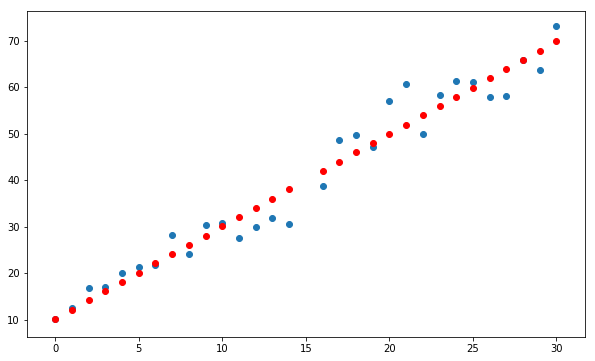

In [6]:
Kosten = "Variante 1" # mögliche Werte: "Variante 1", "Variante 2", "Variante 3", siehe Skript
Lernrate = 0.0001
Anzahl_Iterationen = 2000

### Konstruktion des neuronalen Netzes

y_Vorhersage_x_Werte, a_KNN, b_KNN = knn.KNN3_Lernen_1(x_Werte, y_Werte, Kosten, Lernrate, Anzahl_Iterationen)
        
print('\n')
print("Wert für a: " + str(a_KNN[0][0]) + " und für b: " + str(b_KNN[0][0]))
print("Vorhersage für x=15: " + str(15 * a_KNN[0][0] + b_KNN[0][0]))
print("Vorhersage für x=40: " + str(40 * a_KNN[0][0] + b_KNN[0][0]))

plt.scatter(x_Werte, y_Werte)
plt.scatter(x_Werte, y_Vorhersage_x_Werte, color='red')
plt.show()

Zusammenfassung:

In [7]:
print("Werte für a und b:")
print("Geschätzte Werte:  a = " + str(a) + ", b = " + str(b))
print("Kleinste-Quadrate-Schätzung: a = " + str(a_kqs) + ", b = " + str(b_kqs))
print("Neuronales Netz: a = " + str(a_KNN[0][0]) + ", b = " + str(b_KNN[0][0]))
print('\n')

print("Vorhersage für x = 15:")
print("Geschätzter Wert:  a = " + str(a*15+b))
print("Kleinste-Quadrate-Schätzung: a = " + str(a_kqs*15+b_kqs))
print("Neuronales Netz: a = " + str(a_KNN[0][0]*15+b_KNN[0][0]))

print("Vorhersage für x = 40:")
print("Geschätzter Wert:  " + str(a*40+b))
print("Kleinste-Quadrate-Schätzung: " + str(a_kqs*40+b_kqs))
print("Neuronales Netz: " + str(a_KNN[0][0]*40+b_KNN[0][0]))


Werte für a und b:
Geschätzte Werte:  a = 1, b = 0
Kleinste-Quadrate-Schätzung: a = 1.9664075443911289, b = 10.59344865879974
Neuronales Netz: a = 1.9894428, b = 10.121374


Vorhersage für x = 15:
Geschätzter Wert:  a = 15
Kleinste-Quadrate-Schätzung: a = 40.089561824666674
Neuronales Netz: a = 39.963016510009766
Vorhersage für x = 40:
Geschätzter Wert:  40
Kleinste-Quadrate-Schätzung: 89.24975043444489
Neuronales Netz: 89.69908714294434


# Approximieren der Exponentialfunktion
Wir betrachten nun als Datensatz Punkte, die exakt auf dem Graphen der Exponentialfunktion liegen.

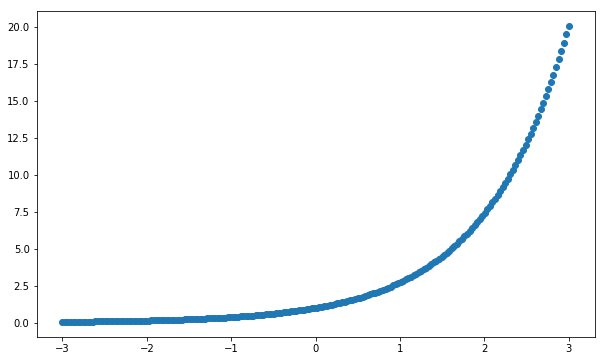

In [8]:
x_Werte_Exp = np.linspace(-3,3,200)
y_Werte_Exp = np.exp(x_Werte_Exp)

plt.scatter(x_Werte_Exp, y_Werte_Exp)
plt.show()

Verändern Sie die Werte für Lernrate, Anzahl_Iterationen, Anzahl_verborgene_Neuronen und Aktivierungsfunktion, so dass die gelernte Funktion einen möglichst kleinen Fehler auf den Trainingsdaten hat (Fehler < 2).

Kosten bei Iteration 1000: 218.10056
Wert für a: 1.1321084 und für b: 0.0
Kosten bei Iteration 2000: 218.10052
Wert für a: 1.1320995 und für b: 0.0


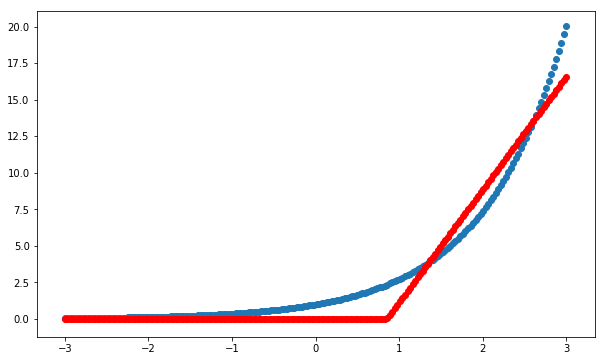

Der Approximationsfehler beträgt: 3.4875
Leider ist der Fehler > 2 :(


In [13]:
Lernrate = 0.0001
Anzahl_Iterationen = 2000
Anzahl_verborgene_Neuronen = 3
Aktivierungsfunktion = "ReLU" # mögliche Werte: "ReLU", "Sigmoid", "Linear"

y_Vorhersage_x_Werte = knn.KNN3_Lernen_2(x_Werte_Exp, y_Werte_Exp, Lernrate, Anzahl_Iterationen, Anzahl_verborgene_Neuronen, Aktivierungsfunktion)       

plt.scatter(x_Werte_Exp, y_Werte_Exp)
plt.scatter(x_Werte_Exp, y_Vorhersage_x_Werte, color='red')
plt.show()

maxi = 0
for j in range(len(x_Werte_Exp)):
    maxi = max(maxi, np.abs(y_Werte_Exp[j]-y_Vorhersage_x_Werte[j]))
print("Der Approximationsfehler beträgt: " + str("{:.4f}".format(maxi[0])))
if maxi < 2:
    print("Der Fehler ist < 2, Glückwunsch!")
else:
    print("Leider ist der Fehler > 2 :(")

Die nächste Zelle zeigt uns eine interne Darstellung unseres KNN.
Hierbei steht "sub" für "subtrahieren", "square" für "quadrieren", "sum" für "Summe" und "GradientDescent" für das Gradientenverfahren.


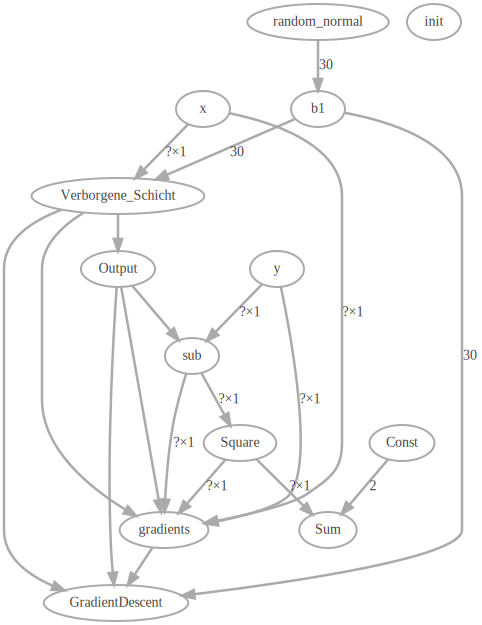

In [0]:

tfg.board(tf.get_default_graph())